In [1]:
from config import cfg
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from data import *

In [6]:
dataloaders = build_dataloaders(0)

In [7]:
labels = [label for _, label in dataloaders['train'].dataset]

In [12]:
pos, total = 0, 0
for mode in ['train', 'val']:
    for _, label in dataloaders[mode].dataset:
        pos += label.sum().item()
        total += 128*128

In [17]:
20926/327680, 306754/327680

(0.063861083984375, 0.936138916015625)

In [3]:
from losses import loss_fns
import json
import matplotlib.pyplot as plt
from config import cfg
import numpy as np
import monai
import os
import torch
from glob import glob
from collections import defaultdict

In [7]:
results = defaultdict(list)
for loss_fn in list(loss_fns.keys()) + ['WCE']:
    for val_fold in range(5):
        for model_seed in range(10):
            path = f'outputs/RITE/{loss_fn}/val_fold{val_fold}/seed{model_seed}/results.json'
            if not os.path.exists(path): continue
            with open(path, 'r') as file:
                f = json.load(file)
                if 'test_DSC' in f:
                    results[loss_fn].append(f['test_DSC'][0])

In [8]:
for loss_fn in results:
    if not results[loss_fn]: continue
    print(f'{loss_fn:<30s} {np.mean(results[loss_fn]):.2f}+-{np.std(results[loss_fn]):.2f} ({len(results[loss_fn])} runs)')

CE                             0.29+-0.09 (50 runs)
Focal_gamma1                   0.24+-0.08 (50 runs)
Focal_gamma2                   0.20+-0.06 (50 runs)
Focal_gamma3                   0.16+-0.05 (50 runs)
Dice                           0.45+-0.10 (50 runs)
SDice                          0.60+-0.02 (50 runs)
DiceCE                         0.57+-0.02 (50 runs)
SDiceCE                        0.59+-0.02 (50 runs)
DiceFocal_gamma2               0.57+-0.02 (50 runs)
SDiceFocal_gamma2              0.60+-0.02 (50 runs)
WCE                            0.53+-0.02 (50 runs)


In [10]:
def get_DSCs(loss_fn):
    DSCs = []
    for path in glob(f'C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/segmentation2d/outputs/BUS/{loss_fn}/val*_test*/results.json'):
        with open(path, 'r') as file:
            results = json.load(file)
            if 'test_DSC' in results:
                DSCs.append(results['test_DSC'][0])
    return DSCs

In [23]:
for loss_fn in ['Dice_smooth', 'Tversky_smooth', 'FocalTversky_smooth']:
    DSCs = get_DSCs(loss_fn)
    print(f'{loss_fn} {" " * (20-len(loss_fn))}{np.mean(DSCs):.2f}±{np.std(DSCs):.2f}')

Dice_smooth          0.60±0.03
Tversky_smooth       0.60±0.03
FocalTversky_smooth  0.61±0.04


In [26]:
def visualize(loss_fns):
    figsize = 3
    fig, axes = plt.subplots(2, len(loss_fns), figsize=(figsize * len(loss_fns), figsize * 2))
    for col, loss_fn in enumerate(loss_fns):
        with open(f'C:/Users/kerry/OneDrive/Desktop/Projects/Code/EDL/segmentation2d/outputs/BUS/{loss_fn}/val0_test4/results.json', 'r') as file:
            results = json.load(file)
        ax = axes[0][col]
        for mode in ['train', 'val']:
            loss = results[f'{mode}_loss']
            ax.plot(range(len(loss)), loss, label=mode)
        ax.set_title(loss_fn); ax.set_ylabel('Loss'); ax.legend(loc=1)

        ax = axes[1][col]
        for mode in ['train', 'val']:
            dsc = results[f'{mode}_DSC']
            ax.plot(range(len(dsc)), dsc, label=mode)
        test_DSC = results[f'test_DSC'][0]
        ax.axhline(test_DSC, color='red', linestyle='--', label=f'test: {test_DSC:.3f}')
        ax.set_ylim((0, 1))
        ax.set_xlabel('Epoch'); ax.set_ylabel('DSC'); ax.legend(loc=4)
    plt.tight_layout()
    # plt.savefig('loss_dsc.jpeg', dpi=1000)
    plt.show()

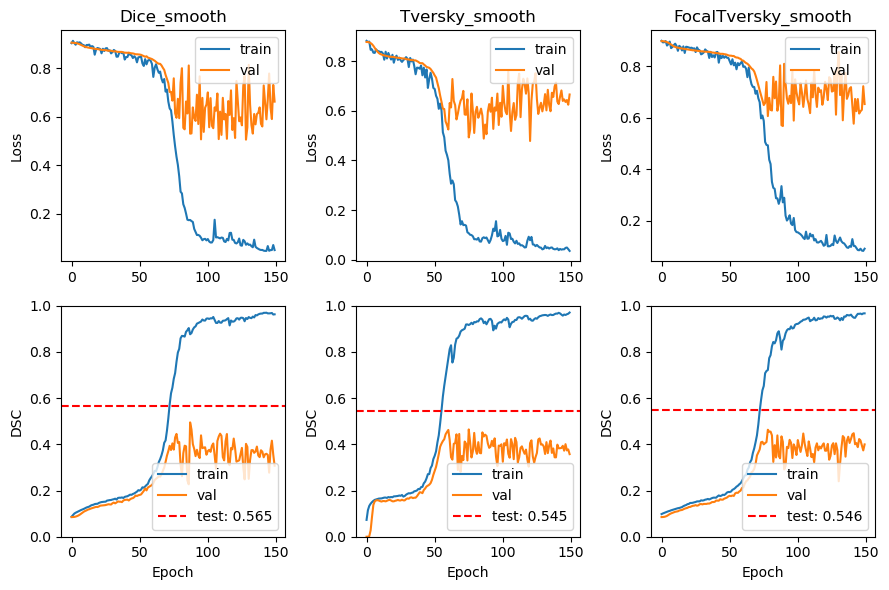

In [27]:
visualize(['Dice_smooth', 'Tversky_smooth', 'FocalTversky_smooth'])